In [2]:
#Start for PCA for data visualizatron
#Code from https://github.com/mGalarnyk/Python_Tutorials/blob/master/
#Sklearn/PCA/PCA_Data_Visualization_Iris_Dataset_Blog.ipynb

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [3]:
df = pd.read_csv('c:/users/admin/documents/data science/smu/courses/ds 7331 - data mining/data sets/chile earthquake pregnancy outcome/Chilean_Earthquake_Binary_data.csv')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4076 entries, 0 to 4075
Data columns (total 22 columns):
Clinic_ID         239 non-null float64
Excel_File_ID     4076 non-null int64
Day               4076 non-null int64
Month             4076 non-null int64
Year              4076 non-null int64
Sex               4076 non-null int64
Weight            4076 non-null int64
Length            4076 non-null float64
Head_circ         4076 non-null float64
apgar_1           4076 non-null int64
apgar_5           4076 non-null int64
Municipality      4076 non-null int64
Wgt_for_age       4076 non-null int64
Gest_age          4076 non-null int64
Trimester         4076 non-null int64
Low_birthwgt      4076 non-null int64
Premature         4076 non-null int64
Maternal_age      4076 non-null int64
Parity            4074 non-null float64
Trim_study        4076 non-null int64
Ponderal_index    4076 non-null float64
Exposed           4076 non-null int64
dtypes: float64(5), int64(17)
memory usage: 700.

In [4]:
#replace NaN in Parity with 0
df['Parity'].fillna(0, inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4076 entries, 0 to 4075
Data columns (total 22 columns):
Clinic_ID         239 non-null float64
Excel_File_ID     4076 non-null int64
Day               4076 non-null int64
Month             4076 non-null int64
Year              4076 non-null int64
Sex               4076 non-null int64
Weight            4076 non-null int64
Length            4076 non-null float64
Head_circ         4076 non-null float64
apgar_1           4076 non-null int64
apgar_5           4076 non-null int64
Municipality      4076 non-null int64
Wgt_for_age       4076 non-null int64
Gest_age          4076 non-null int64
Trimester         4076 non-null int64
Low_birthwgt      4076 non-null int64
Premature         4076 non-null int64
Maternal_age      4076 non-null int64
Parity            4076 non-null float64
Trim_study        4076 non-null int64
Ponderal_index    4076 non-null float64
Exposed           4076 non-null int64
dtypes: float64(5), int64(17)
memory usage: 700.

In [5]:
#Begin to Standardize the independent variables (or features) - the ones for the PCA.
#Leave out Clinic_ID, Excel_File_ID, Day, Month, Year, Weight, Length, apgar_1, Trim_study
#because these either non-data or subsumed by another.

features = ['Sex', 'Head_circ', 'apgar_1', 'apgar_5', 'Municipality', 'Wgt_for_age', 'Gest_age', 
            'Trimester', 'Low_birthwgt', 'Premature', 'Maternal_age', 'Parity', 'Ponderal_index']
x = df.loc[:, features].values

In [6]:
#Define the "Target", the y variable for PCA y = df.loc[:,['target']].values
y = df.loc[:,['Exposed']].values

In [7]:
#Transform the data to scale it to mean = 0 and sd = 1
x = StandardScaler().fit_transform(x)

In [33]:
#View our standardized data.
#Note that "pd.DataFrame" is a function, not a name of the data frame
pd.DataFrame(data = x, columns = features).head()

,Sex,Head_circ,apgar_1,apgar_5,Municipality,Wgt_for_age,Gest_age,Trimester,Low_birthwgt,Premature,Maternal_age,Parity,Ponderal_index
0,0.976239,-0.159605,0.318204,-0.697388,0.813798,-0.348089,1.113912,0.000299,-0.115871,-0.170391,-1.643077,-0.781494,0.655883
1,-1.024339,-0.580810,0.318204,1.219370,-0.751582,1.729234,1.113912,1.219745,-0.115871,-0.170391,0.773269,-0.781494,-1.789050
2,-1.024339,0.261600,-1.051383,-0.697388,0.813798,-0.348089,-1.677831,1.219745,-0.115871,-0.170391,-1.828950,-0.781494,0.025925
3,0.976239,0.682805,0.318204,-0.697388,0.813798,-0.348089,1.113912,1.219745,-0.115871,-0.170391,-1.643077,-0.781494,-0.548904
4,-1.024339,1.104010,0.318204,1.219370,0.813798,-0.348089,1.113912,1.219745,-0.115871,-0.170391,-0.527840,-0.781494,-0.537807


In [8]:
###Redo the model, ask for 3 component model
features = ['Sex', 'Head_circ', 'apgar_1', 'apgar_5', 'Municipality', 'Wgt_for_age', 'Gest_age', 
            'Trimester', 'Low_birthwgt', 'Premature', 'Maternal_age', 'Parity', 'Ponderal_index']
x = df.loc[:, features].values
y = df.loc[:,['Exposed']].values
x = StandardScaler().fit_transform(x)

#View our standardized data.
#Note that "pd.DataFrame" is a function, not a name of the data frame
pd.DataFrame(data = x, columns = features).head()

pca = PCA(n_components=3)
principalComponents3 = pca.fit_transform(x)
principalDf3 = pd.DataFrame(data = principalComponents3,
                          columns = ['principal component 1', 'principal component 2', 'principal component 3'])

In [9]:
pca.explained_variance_ratio_

##This gives ~38% variance covered/explained/lost for 3 component model

array([0.15136757, 0.11853766, 0.1057593 ])

In [10]:
#Redo the model to get a four component model

pca = PCA(n_components=4)
principalComponents4 = pca.fit_transform(x)
principalDf4 = pd.DataFrame(data = principalComponents4,
                          columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4'])

In [11]:
pca.explained_variance_ratio_

##This gives ~46% variance covered/explained/lost for 4 component model

array([0.15136757, 0.11853766, 0.1057593 , 0.0858756 ])

In [12]:
##Look at a 5 component model

pca = PCA(n_components=5)
principalComponents5 = pca.fit_transform(x)
principalDf5 = pd.DataFrame(data = principalComponents5,
                          columns = ['principal component 1', 'principal component 2', 'principal component 3',
                                     'principal component 4', 'principal component 5'])

In [13]:
pca.explained_variance_ratio_

##This gives ~54% variance covered/explained/lost for 5 component model

array([0.15136757, 0.11853766, 0.1057593 , 0.0858756 , 0.08042053])

In [15]:
##Because the explained variance keeps going up as another variable is added,
#Use code to find model that covers a predetermined amount of varience.
###In this instance, cover 80%.

# Make an instance of the Model
pca = PCA(.80)


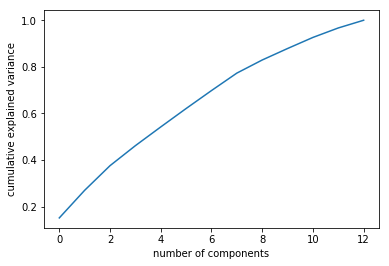

In [16]:
#Explained variance Scree plot using matplotlib

pca = PCA().fit(x)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [17]:
#PCA Projection to smaller number of variables
#I chose 2 components because only a 2-dimensional plot is being done.

pca = PCA(n_components=2)

In [18]:
principalComponents = pca.fit_transform(x)

In [19]:
principalDf = pd.DataFrame(data = principalComponents,
                          columns = ['principal component 1', 'principal component 2'])

In [20]:
#View the first 5 principal component data lines

principalDf.head(5)

,principal component 1,principal component 2
0,-0.627517,-1.833877
1,-0.149055,-0.062733
2,0.831413,-1.784753
3,-0.694648,-2.068422
4,-1.148856,-0.759189


In [21]:
#Join the two data frames together and view 5 lines.

finalDf = pd.concat([principalDf, df[['Exposed']]], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,Exposed
0,-0.627517,-1.833877,0
1,-0.149055,-0.062733,0
2,0.831413,-1.784753,0
3,-0.694648,-2.068422,0
4,-1.148856,-0.759189,0


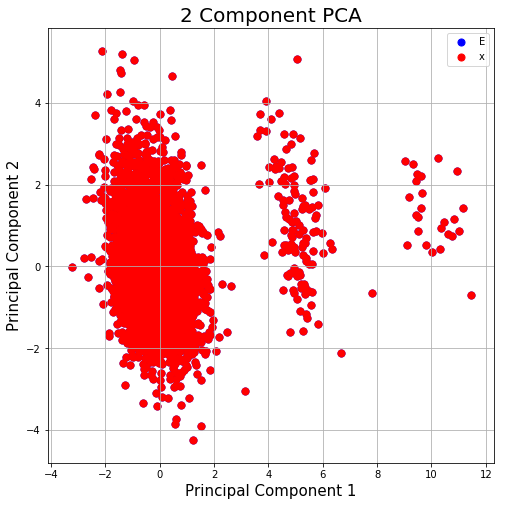

In [22]:
##Visualize the Projection
#Use a PcA projection to 2D to visualize the entire data set.
#Plot different classes using different colors or shapes.
#Do the classes seem well-seperated from each other?

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = ['Not Exposed', 'Exposed']
colors = ['b', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Exposed'] == finalDf.Exposed
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend('Exposed')
ax.grid()